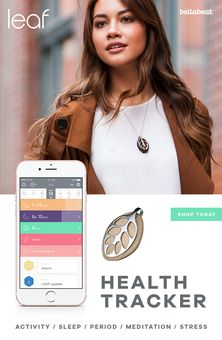

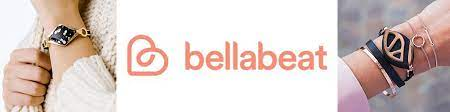



# Business Task

Founded in 2013, Bellabeat is a high-tech manufacturer of health-focused products for women. Bellabeat has launched 5 products. Bellabeat app which provides users with health data related to their activity, sleep, stress, menstrual cycle, and mindfulness habits. It helps users better understand their current habits and make healthy decisions. "Leaf" classic wellness tracker can be worn as a bracelet, necklace, or clip. "Time" watch combines the timeless look of a classic timepiece with smart technology to track user activity, sleep, and stress. "Spring" a water bottle that tracks daily water intake using smart technology to ensure that you are appropriately hydrated throughout the day. It connects to the Bellabeat app to track your hydration levels. Bellabeat also offers a subscription-based membership program for users. It gives users 24/7 access to fully personalized guidance on nutrition, activity, sleep, health and beauty, and mindfulness based on their lifestyle and goals.



Its goal is to become a large player in the global smart device market. The company has invested in traditional advertising media but focuses on digital marketing extensively. Bellabeat invests year-round in Google Search, maintaining active Facebook and Instagram pages, and
consistently engages consumers on Twitter. Additionally, Bellabeat runs video ads on Youtube and display ads on the Google
Display Network to support campaigns around key marketing dates. Bellabeat’s available consumer data would reveal more opportunities for growth and our job is to find best recommandation to take Bellabeat into the next level by analyzing the existiexisting data of user experience. 

# ASK

> 1. What are some trends in smart device usage?
> 2. How could these trends apply to Bellabeat customers?
> 3. How could these trends help influence Bellabeat marketing strategy

# PREPARE

18 CSV files are available from FitBit Fitness Tracker Data (CC0: Public Domain, dataset made available through Mobius). This Kaggle data set contains personal fitness tracker from thirty Fitbit users consented to the submission of personal tracker data.

We will use R as the tool because we can explore, process and visualize datasets in one platform, RStudio Cloud. SQL queries can also be used on data frames by running sqldf(). The files are uploaded into the RStudio Cloud work directory /cloud/project/BellaBeat/Fitabase.

In [1]:
library(tidyverse) #a must-have in R 
library(janitor) #for examining and cleaning dirty data
library(lubridate) #for date & time formats
library(sqldf) #for running SQL in R
library(ggplot2) #for creating and customizing ggplot2
library(waffle) #for the waffle charts
library(scales) #scaling used by ggplots
library(RColorBrewer) #for beautiful color palettes

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.1.8
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test


Loading required package: gsubfn

Loading required package: proto

Warning message:
“no DISPLAY variable so Tk is not available”
Loading required package: RSQLite


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




In [2]:
activity <- read_csv(file= "../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv") 
calories <- read_csv(file= "../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv") 
intensities <- read.csv(file= "../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv")
step <- read.csv(file= "../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv")
h_step <- read.csv(file= "../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")
sleep <- read.csv(file= "../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weight <- read.csv(file= "../input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")

Rows: 940 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 940 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityDay
dbl (2): Id, Calories

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


> # Verifying data

Based on observation,  dailyCalories, dailyIntensities, and dailySteps could be subsets of dailyActivities. Let's verify this with SQL queries by running sqldf():

In [3]:
sqldf("SELECT COUNT()
      FROM activity 
      LEFT JOIN calories ON 
      activity.Id = calories.Id AND 
      activity.ActivityDate = calories.ActivityDay AND 
      activity.Calories = calories.Calories")

COUNT()
<int>
940


In [4]:
sqldf("SELECT COUNT()
      FROM activity 
      LEFT JOIN step  ON 
      activity.Id = step.Id AND 
      activity.ActivityDate = step.ActivityDay AND 
      activity.Totalsteps = step.StepTotal")

COUNT()
<int>
940


In [5]:
sqldf("SELECT COUNT()
      FROM activity 
      LEFT JOIN intensities  ON 
      activity.Id = intensities.Id AND 
      activity.ActivityDate = intensities.ActivityDay")

COUNT()
<int>
940



As all 3 queries return 940, we verify that dailyActivity contains dailyCalories, dailyIntensities and dailySteps, we will remove them and use dailyActivities as one dataframe.

In [6]:
rm(calories,intensities,step) #rm() for deleting

In [7]:
n_distinct(activity$Id) 
n_distinct(h_step$Id) 
n_distinct(sleep$Id) 
n_distinct(weight$Id)

[1] 33

[1] 33

[1] 24

[1] 8

Due to the small sample size of weight data, it will be excluded from this study. Sample size of sleep data is rather small too, but we will keep it for reference.
After reviewing the sample size, let's check and clean duplicates:

In [8]:
sum(duplicated(activity))
sum(duplicated(h_step))
sum(duplicated(sleep))

[1] 0

[1] 0

[1] 3

In [9]:
sleep <- unique(sleep)
sum(duplicated(sleep))

[1] 0

# Process 

> First step in this phase is data cleaning. 
> 
> We notice the columns are in CamelCase naming convention. 
> 
> As R is case sensitive, we will first change all columns to lower case to make merging files easier

In [10]:
activity <- rename_with(activity, tolower)
sleep <- rename_with(sleep, tolower)
h_step <- rename_with(h_step, tolower)

head(activity)
head(sleep)
head(h_step)

id,activitydate,totalsteps,totaldistance,trackerdistance,loggedactivitiesdistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,sedentaryactivedistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


,id,sleepday,totalsleeprecords,totalminutesasleep,totaltimeinbed
,<dbl>,<chr>,<int>,<int>,<int>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346
2,1503960366,4/13/2016 12:00:00 AM,2,384,407
3,1503960366,4/15/2016 12:00:00 AM,1,412,442
4,1503960366,4/16/2016 12:00:00 AM,2,340,367
5,1503960366,4/17/2016 12:00:00 AM,1,700,712
6,1503960366,4/19/2016 12:00:00 AM,1,304,320


,id,activityhour,steptotal
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016 12:00:00 AM,373
2,1503960366,4/12/2016 1:00:00 AM,160
3,1503960366,4/12/2016 2:00:00 AM,151
4,1503960366,4/12/2016 3:00:00 AM,0
5,1503960366,4/12/2016 4:00:00 AM,0
6,1503960366,4/12/2016 5:00:00 AM,0


**Converting date and time format**

In [11]:
activity <- activity %>% 
  rename(date= activitydate) %>%
  mutate(date= as_date(date, format= "%m/%d/%Y"))
sleep <- sleep %>%
  rename(date= sleepday) %>%
  mutate(date= as_date(date, format= "%m/%d/%Y  %I:%M:%S %p", tz= Sys.timezone()))
head(activity)
head(sleep)

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `date = as_date(date, format = "%m/%d/%Y %I:%M:%S %p", tz =
  Sys.timezone())`.
Caused by warning:
! `tz` argument is ignored by `as_date()`”


id,date,totalsteps,totaldistance,trackerdistance,loggedactivitiesdistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,sedentaryactivedistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


,id,date,totalsleeprecords,totalminutesasleep,totaltimeinbed
,<dbl>,<date>,<int>,<int>,<int>
1,1503960366,2016-04-12,1,327,346
2,1503960366,2016-04-13,2,384,407
3,1503960366,2016-04-15,1,412,442
4,1503960366,2016-04-16,2,340,367
5,1503960366,2016-04-17,1,700,712
6,1503960366,2016-04-19,1,304,320


We'll also convert $activityhour column in h_step data to date-time format

In [12]:
h_step <- h_step %>% 
  rename(date_time= activityhour) %>% 
  mutate(date_time= as.POSIXct(date_time, format="%m/%d/%Y %I:%M:%S %p", tz= Sys.timezone()))

head(h_step)

,id,date_time,steptotal
,<dbl>,<dttm>,<int>
1,1503960366,2016-04-12 00:00:00,373
2,1503960366,2016-04-12 01:00:00,160
3,1503960366,2016-04-12 02:00:00,151
4,1503960366,2016-04-12 03:00:00,0
5,1503960366,2016-04-12 04:00:00,0
6,1503960366,2016-04-12 05:00:00,0


**Merging dataframes**

Merge daily dataframes into activity_sleep. As sleep has fewer observations, add all.x =TRUE in the script to keep unmatched cases in activity.

In [13]:
activity_sleep <- merge(activity, sleep, by=c("id","date"), all.x=TRUE)
head(activity_sleep)

,id,date,totalsteps,totaldistance,trackerdistance,loggedactivitiesdistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,sedentaryactivedistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories,totalsleeprecords,totalminutesasleep,totaltimeinbed
,<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,1,327,346
2,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,2,384,407
3,1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776,NA,NA,NA
4,1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,1,412,442
5,1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,2,340,367
6,1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,1,700,712


#  Analyze 

> # Daily Data Summary

In [14]:
activity_sleep %>%
  select(totalsteps, calories,
         veryactiveminutes, fairlyactiveminutes, lightlyactiveminutes, sedentaryminutes,
         totalsleeprecords, totalminutesasleep, totaltimeinbed)%>%
drop_na()%>%
summary()

   totalsteps       calories    veryactiveminutes fairlyactiveminutes
 Min.   :   17   Min.   : 257   Min.   :  0.00    Min.   :  0.00     
 1st Qu.: 5189   1st Qu.:1841   1st Qu.:  0.00    1st Qu.:  0.00     
 Median : 8913   Median :2207   Median :  9.00    Median : 11.00     
 Mean   : 8515   Mean   :2389   Mean   : 25.05    Mean   : 17.92     
 3rd Qu.:11370   3rd Qu.:2920   3rd Qu.: 38.00    3rd Qu.: 26.75     
 Max.   :22770   Max.   :4900   Max.   :210.00    Max.   :143.00     
 lightlyactiveminutes sedentaryminutes totalsleeprecords totalminutesasleep
 Min.   :  2.0        Min.   :   0.0   Min.   :1.00      Min.   : 58.0     
 1st Qu.:158.0        1st Qu.: 631.2   1st Qu.:1.00      1st Qu.:361.0     
 Median :208.0        Median : 717.0   Median :1.00      Median :432.5     
 Mean   :216.5        Mean   : 712.1   Mean   :1.12      Mean   :419.2     
 3rd Qu.:263.0        3rd Qu.: 782.8   3rd Qu.:1.00      3rd Qu.:490.0     
 Max.   :518.0        Max.   :1265.0   Max.   :3.00   

> # Key findings:

* On average, each users takes 7,638 steps per day. This is lower than the daily 10,000 steps recommended by CDC.
* On average, each users spends 16.5 hours per day being seated or inactive. That's almost 70% of the day!
* The  median in very active minutes and fairly active minutes is smaller than the mean, indicating a non-normal distribution. This indicates there may be only a few users with much longer active minutes, while most users are with short active minutes.
* On average, each users sleeps 6.98 hours per day.

> # Correlations

We want to find out if there are correlations between these variables:

* Daily Steps vs Calories

* Daily Steps vs Daily Sleep

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


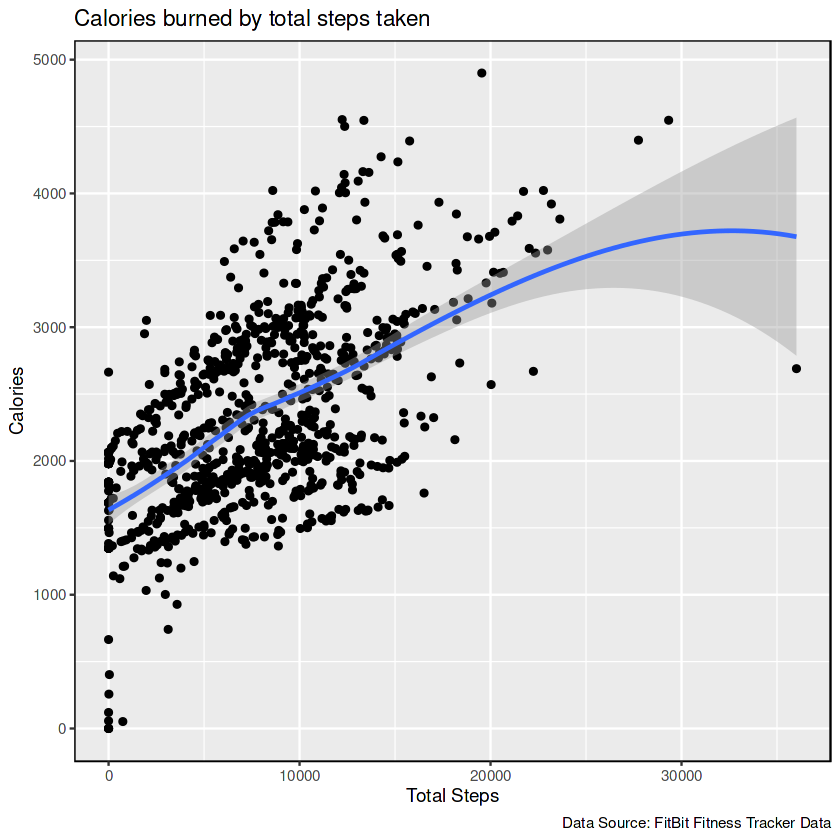

In [15]:
ggplot(data=activity, aes(x=totalsteps, y=calories)) + 
geom_point() +
geom_smooth() + 
  theme(legend.position = c(.8, .3),
        legend.spacing.y = unit(1, "mm"), 
        panel.border = element_rect(colour = "black", fill=NA),
        legend.background = element_blank(),
        legend.box.background = element_rect(colour = "black")) +
labs(title = 'Calories burned by total steps taken',
       y = 'Calories',
       x = 'Total Steps',
       caption = 'Data Source: FitBit Fitness Tracker Data')

> The More Steps = The More Calorie Burn

In [16]:
cor.test(activity_sleep$totalsteps, activity_sleep$calories, method = 'pearson', conf.level = 0.95)


	Pearson's product-moment correlation

data:  activity_sleep$totalsteps and activity_sleep$calories
t = 22.472, df = 938, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.5483688 0.6316184
sample estimates:
      cor 
0.5915681 


**With a confidence level of 95%, the correlation between the variables is almost 0.6. This means that there is a strong relationship between the variables**

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


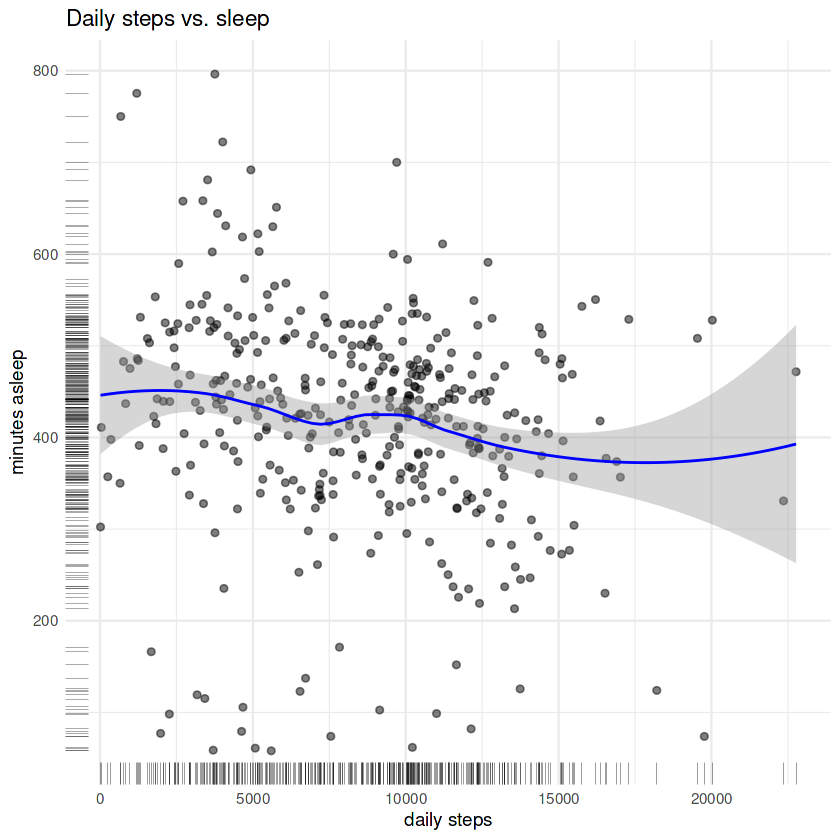

In [17]:
#steps vs. sleep  
ggplot(data= subset(activity_sleep,!is.na(totalminutesasleep)),aes(totalsteps,totalminutesasleep))+
    geom_rug(position= "jitter", size=.08)+
    geom_jitter(alpha= 0.5)+
    geom_smooth(color= "blue", size=.6)+
    labs(title= "Daily steps vs. sleep", x= "daily steps", y= "minutes asleep")+
    theme_minimal()

> Little to no correlation between steps and amount of minutes users sleep per day

Again, corralation result can be found here: https://www.kaggle.com/code/irenashen1/capstone-bellabeat-case-study-r?cellIds=33&kernelSessionId=119803274&scriptVersionId=119803274&cellId=35

In [18]:
h_step <- h_step %>% 
  separate(date_time, into= c("date", "time"), sep = " ") %>% 
  mutate(date= ymd (date))

head(h_step)

,id,date,time,steptotal
,<dbl>,<date>,<chr>,<int>
1,1503960366,2016-04-12,00:00:00,373
2,1503960366,2016-04-12,01:00:00,160
3,1503960366,2016-04-12,02:00:00,151
4,1503960366,2016-04-12,03:00:00,0
5,1503960366,2016-04-12,04:00:00,0
6,1503960366,2016-04-12,05:00:00,0


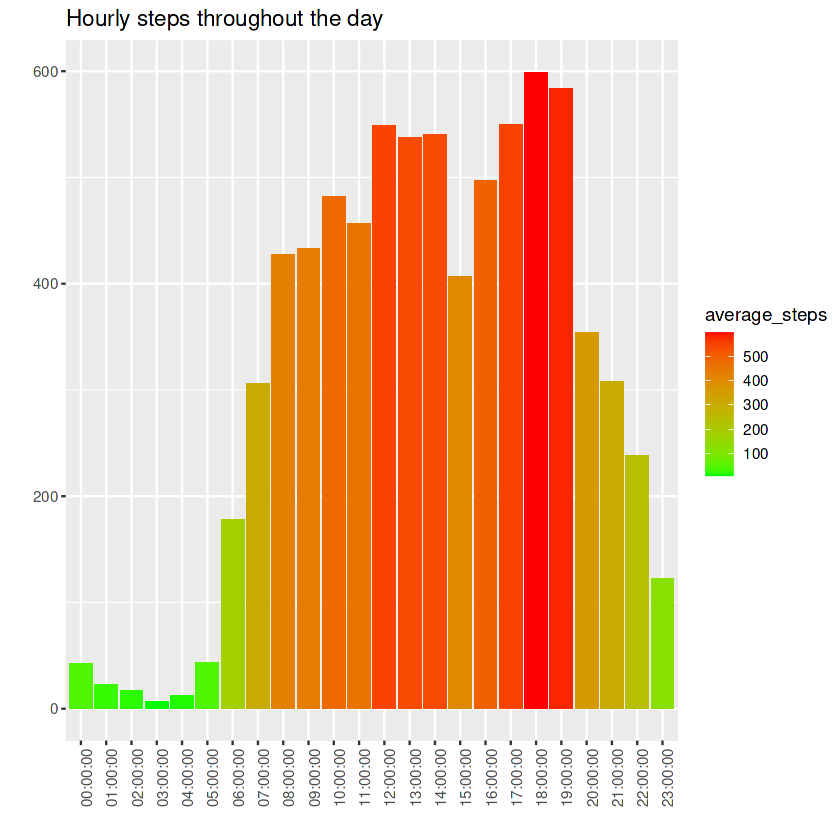

In [19]:
h_step %>%
  group_by(time) %>%
  summarize(average_steps = mean(steptotal)) %>%
  ggplot() +
  geom_col(mapping = aes(x=time, y = average_steps, fill = average_steps)) + 
  labs(title = "Hourly steps throughout the day", x="", y="") + 
  scale_fill_gradient(low = "green", high = "red")+
  theme(axis.text.x = element_text(angle = 90))

> We can see that users are more active between 8am and 7pm. Walking more steps during lunch time from 12pm to 2pm and evenings from 5pm and 7pm.

In [20]:
h_step_weekday <- (h_step)%>%
  mutate(weekday= weekdays(date))%>%
  group_by (weekday,time) %>% 
  summarize(average_steps= mean(steptotal), .groups = 'drop')

h_step_weekday$weekday <- ordered(h_step_weekday$weekday, 
                                 levels=c("Monday", "Tuesday", "Wednesday","Thursday","Friday", "Saturday", "Sunday"))
                                 
head(h_step_weekday)

weekday,time,average_steps
<ord>,<chr>,<dbl>
Friday,00:00:00,44.27778
Friday,01:00:00,19.00794
Friday,02:00:00,16.27778
Friday,03:00:00,10.80159
Friday,04:00:00,14.43651
Friday,05:00:00,61.23016


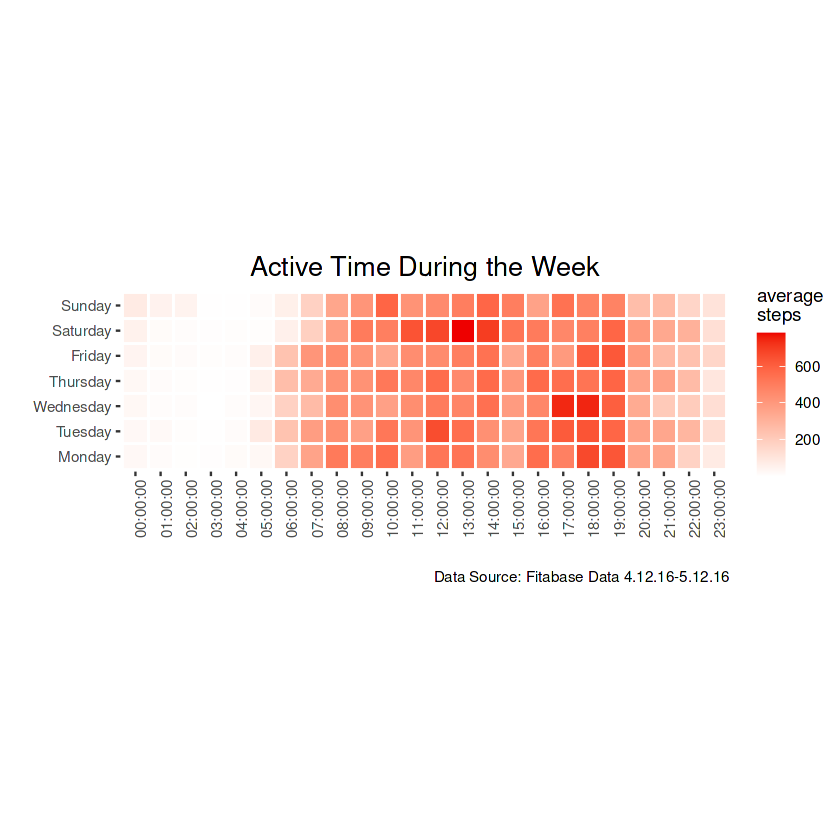

In [21]:
#HEATMAP
ggplot(h_step_weekday, aes(x= time, y= weekday, 
                           fill= average_steps)) +
  theme(axis.text.x= element_text(angle = 90))+
  labs(title= "Active Time During the Week", 
       x=" ", y=" ",fill = "average\nsteps",
       caption= 'Data Source: Fitabase Data 4.12.16-5.12.16')+
  scale_fill_gradient(low= "white", high="red2")+
  geom_tile(color= "white",lwd =.6,linetype =1)+
  coord_fixed()+
  theme(plot.title= element_text(hjust= 0.5,vjust= 0.8, size=16),
        panel.background= element_blank())

**Observation:** 

Most active during 11am-1pm on Saturday, and 5-6pm on Wednesday.

# The distribution

**Grouping users into 4 types**

Based on daily activity level, we further group users into 4 types: 
* Sedentary
* Lightly Active
* Fairly Active
* Very Active

The categorization is based on [this article](https://www.10000steps.org.au/articles/counting-steps/).

In [22]:
daily_average <- activity_sleep %>% 
  group_by (id) %>% 
  summarise(avg_daily_steps= mean(totalsteps), 
            avg_daily_cal= mean(calories), 
            avg_daily_sleep= mean(totalminutesasleep, 
                                   na.rm = TRUE)) %>% 
  mutate(user_type= case_when(
    avg_daily_steps < 5000 ~ "sedentary",
    avg_daily_steps >= 5000 & avg_daily_steps <7499 ~"lightly active",
    avg_daily_steps >= 7499 & avg_daily_steps <9999 ~"fairly active",
    avg_daily_steps >= 10000 ~"very active"
  ))

head(daily_average)

id,avg_daily_steps,avg_daily_cal,avg_daily_sleep,user_type
<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1503960366,12116.742,1816.419,360.28,very active
1624580081,5743.903,1483.355,NaN,lightly active
1644430081,7282.967,2811.300,294.00,lightly active
1844505072,2580.065,1573.484,652.00,sedentary
1927972279,916.129,2172.806,417.00,sedentary
2022484408,11370.645,2509.968,NaN,very active


In [23]:
user_type_sum <- daily_average %>%
  group_by(user_type) %>%
  summarise(total= n()) %>%
  mutate(total_percent= scales::percent (total/sum(total)))

user_type_sum

user_type,total,total_percent
<chr>,<int>,<chr>
fairly active,9,27.3%
lightly active,9,27.3%
sedentary,8,24.2%
very active,7,21.2%


We want to looking to different variables vs each type:

* Types vs. Steps
* Types vs. Calories
* Types vs. Distance
* Types vs. Sleep
To visualize data, we will need to add and reorder $user_type into the activity_sleep_final dataframe:

In [24]:
activity_sleep_final <- merge(activity_sleep, daily_average[c("id","user_type")], by="id") 

activity_sleep_final$user_type <-ordered(activity_sleep_final$user_type, levels= c("sedentary","lightly active","fairly active","very active")) 

head(activity_sleep_final)

,id,date,totalsteps,totaldistance,trackerdistance,loggedactivitiesdistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,sedentaryactivedistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories,totalsleeprecords,totalminutesasleep,totaltimeinbed,user_type
,<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<ord>
1,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,1,327,346,very active
2,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,2,384,407,very active
3,1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776,NA,NA,NA,very active
4,1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,1,412,442,very active
5,1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,2,340,367,very active
6,1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,1,700,712,very active


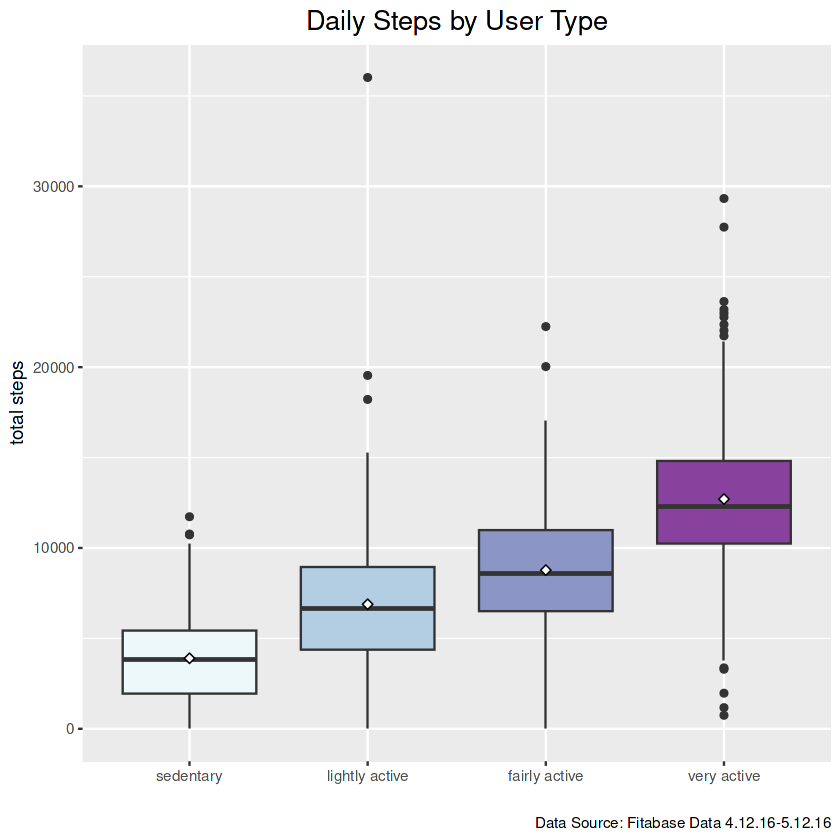

In [25]:
ggplot(activity_sleep_final[which(activity_sleep_final$totalsteps>0),], 
       aes(user_type,totalsteps, fill=user_type))+
  geom_boxplot()+
  stat_summary(fun="mean", geom="point", 
               shape=23,size=2, fill="white")+
  labs(title= "Daily Steps by User Type", 
       x= " ", y="total steps",
       caption= 'Data Source: Fitabase Data 4.12.16-5.12.16')+
  scale_fill_brewer(palette="BuPu")+
  theme(plot.title= element_text(hjust= 0.5,vjust= 0.8, size=16),
        legend.position= "none")

> As shown in the box plot above, very active users take more than 10,000 steps per day, with outliers widely up to 30,000, meaning the daily activity level of this type vary significantly.

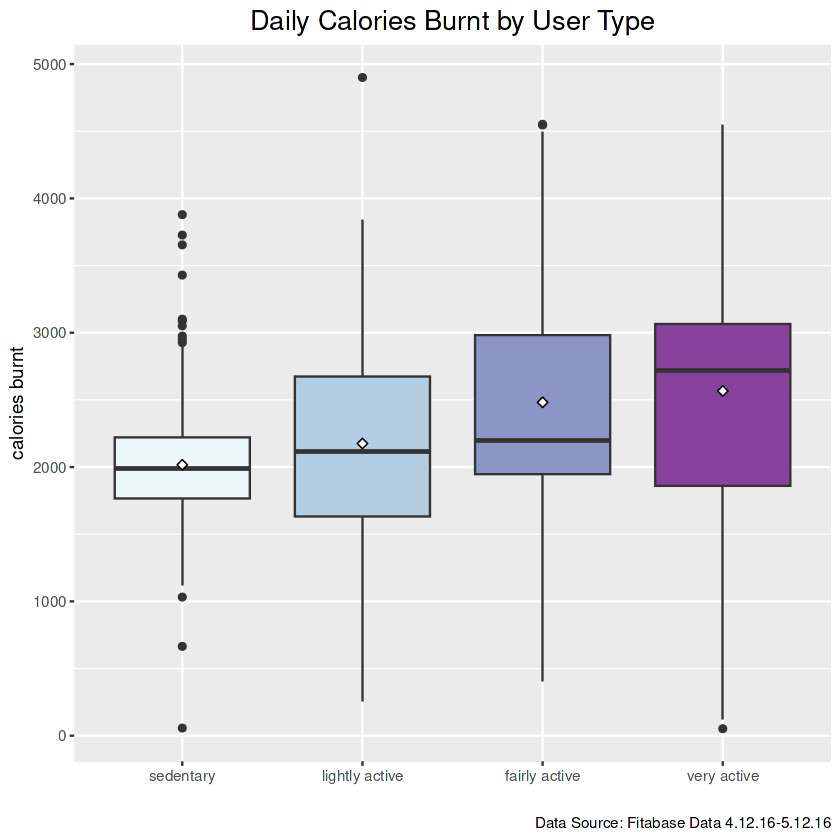

In [26]:
ggplot(activity_sleep_final[which(activity_sleep_final$calories>0),], aes(user_type,calories, fill=user_type))+
  geom_boxplot()+
  stat_summary(fun= "mean", geom= "point", 
               shape= 23,size= 2, fill= "white")+
  labs(title= "Daily Calories Burnt by User Type", 
       x= " ", y="calories burnt",
       caption= 'Data Source: Fitabase Data 4.12.16-5.12.16')+
  scale_fill_brewer(palette="BuPu")+
  theme(plot.title= element_text(hjust= 0.5,vjust= 0.8, size=16),
        legend.position= "none")

> Lightly active has only one outlier, and a mean very close to median, indicating during the time frame, they have the most consistent calories burnt trend.

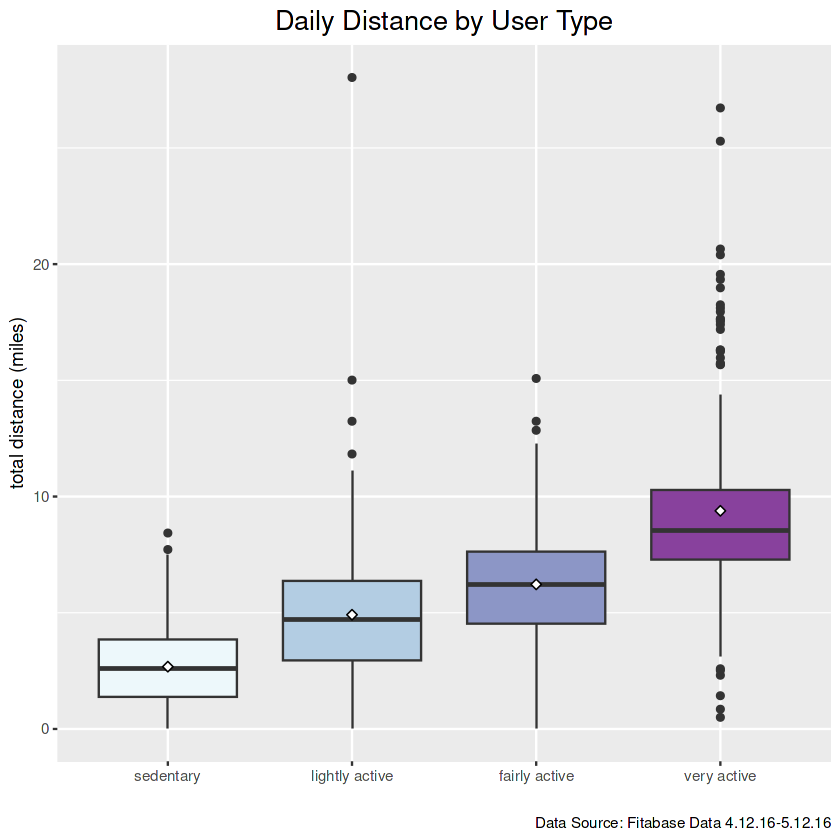

In [27]:
ggplot(activity_sleep_final[which(activity_sleep_final$totaldistance>0),], 
       aes(user_type,totaldistance, fill= user_type))+
  geom_boxplot()+
  stat_summary(fun= "mean", geom= "point", 
               shape= 23,size= 2, fill= "white")+
  labs(title= "Daily Distance by User Type", 
       x= " ", y = "total distance (miles)",
       caption= 'Data Source: Fitabase Data 4.12.16-5.12.16')+
  scale_fill_brewer(palette= "BuPu")+
  theme(plot.title= element_text(hjust= 0.5,vjust= 0.8, size=16),
        legend.position = "none")

> The very active type has the most outliers, meaning their activity pattern is inconsistent

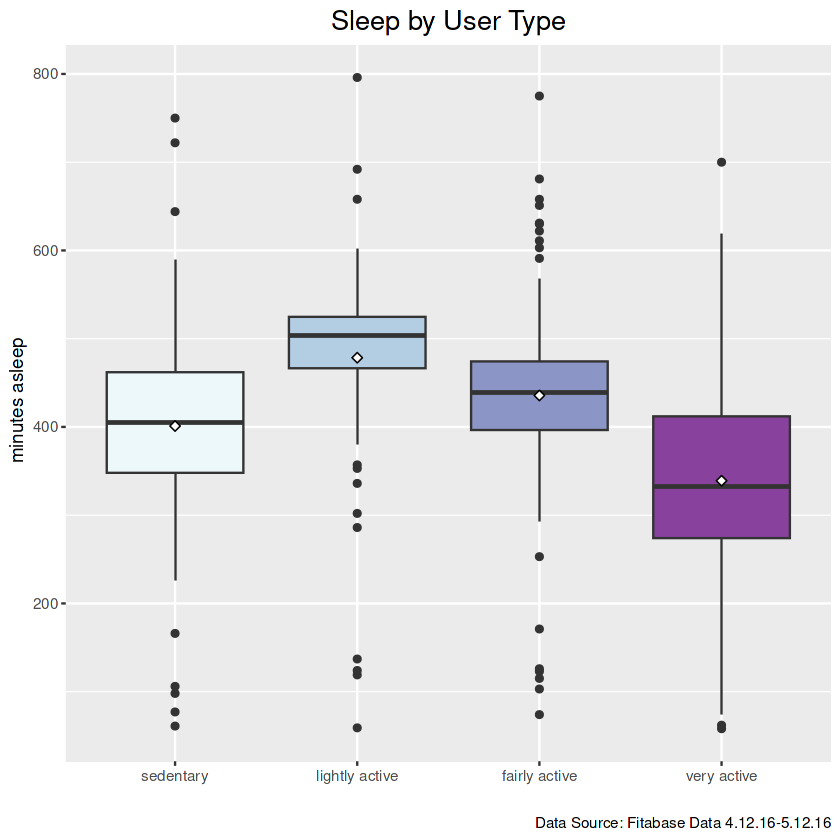

In [28]:
ggplot(subset(activity_sleep_final,!is.na(totalminutesasleep)),
       aes(user_type,totalminutesasleep, fill=user_type))+
  geom_boxplot()+
  stat_summary(fun="mean", geom="point", 
               shape=23,size=2, fill="white")+
  labs(title= "Sleep by User Type", 
       x= " ", y=" minutes asleep", 
       caption= 'Data Source: Fitabase Data 4.12.16-5.12.16')+
  scale_fill_brewer(palette="BuPu")+
  theme(plot.title= element_text(hjust= 0.5,vjust= 0.8, size=16),
        legend.position= "none")

* There are a lot of outliers in the data, meaning the amount of sleep for each type varies significantly.
* The lightly active type has the longest sleep, while the very active type has the least amount of sleep.

# Usage of the Tracker

We want to know how user wear the tracker. First, lets look into the number of days they wore the tracker, and group them into 3 categories: low, mid and high.

In [29]:
daily_use <- activity_sleep_final %>%
  group_by(id) %>%
  summarize(record_days=sum(n())) %>%
  mutate(usage= case_when(
    record_days >= 1 & record_days <= 10 ~ "low",
    record_days >= 11 & record_days <=20 ~ "mid",
    record_days >= 21 & record_days <= 31 ~ "high", 
  ))

head(daily_use)

id,record_days,usage
<dbl>,<int>,<chr>
1503960366,31,high
1624580081,31,high
1644430081,30,high
1844505072,31,high
1927972279,31,high
2022484408,31,high


In [30]:

days_usage_percent <- daily_use %>%
  group_by(usage) %>%
  summarise(user_count= n()) %>%
  mutate(total_percent= scales::percent(user_count/sum(user_count)))

days_usage_percent

usage,user_count,total_percent
<chr>,<int>,<chr>
high,29,87.9%
low,1,3.0%
mid,3,9.1%


Analyzing our results we can see that
* 87.9% of the users of our sample use their device 
* 9.1% use their device 11 to 20 days.
* 3% of use rarely their device.

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


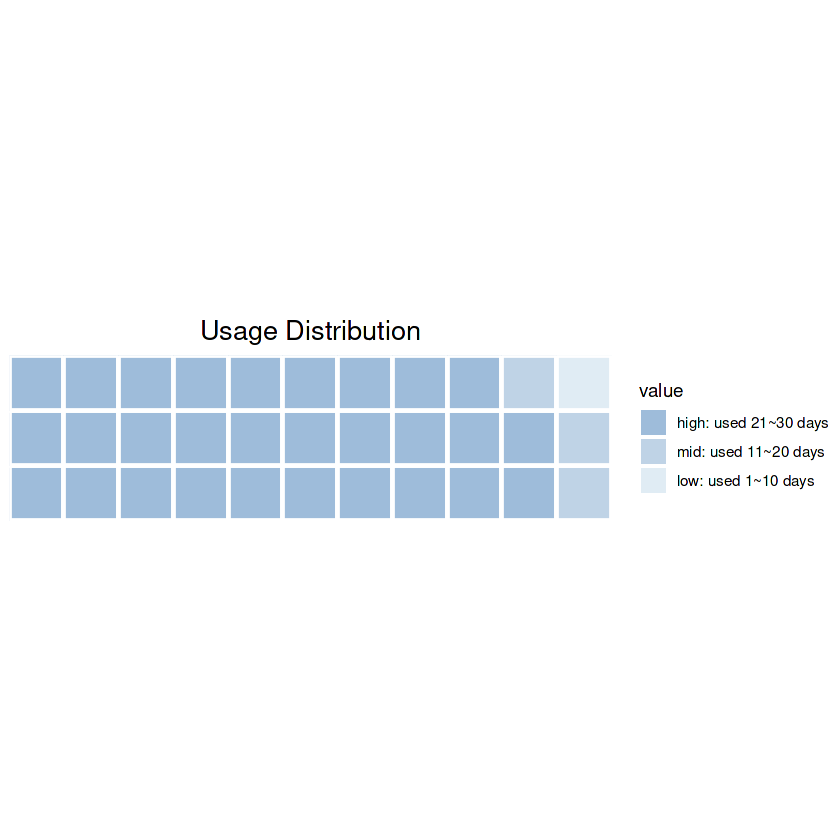

In [31]:
#WAFFLE CHART DISTRIBUTION

library(tibble)
library(waffle)

days_usage_waffle=c("high: used 21~30 days" =29,"mid: used 11~20 days"= 3, "low: used 1~10 days"=1)

waffle(days_usage_waffle, row=3, size=1, legend_pos='right')+
  labs(title= "Usage Distribution")+
  scale_fill_manual(values=c("#9EBCDA","#BFD3E6","#E0ECF4"))+
  theme(panel.background= element_blank(),
        plot.title= element_text(hjust= 0.5,vjust= 1, size=16))

> Most of users wear the tracker more than 21 days during the period of a month. 

In [32]:
h_step_trend<-(h_step) %>%
  group_by(date) %>%
  summarise(average_hr= n()/33)

head(h_step_trend) #This is the average hours users keep the tracker on.

date,average_hr
<date>,<dbl>
2016-04-12,24.00000
2016-04-13,24.00000
2016-04-14,24.00000
2016-04-15,23.75758
2016-04-16,23.27273
2016-04-17,23.27273


Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


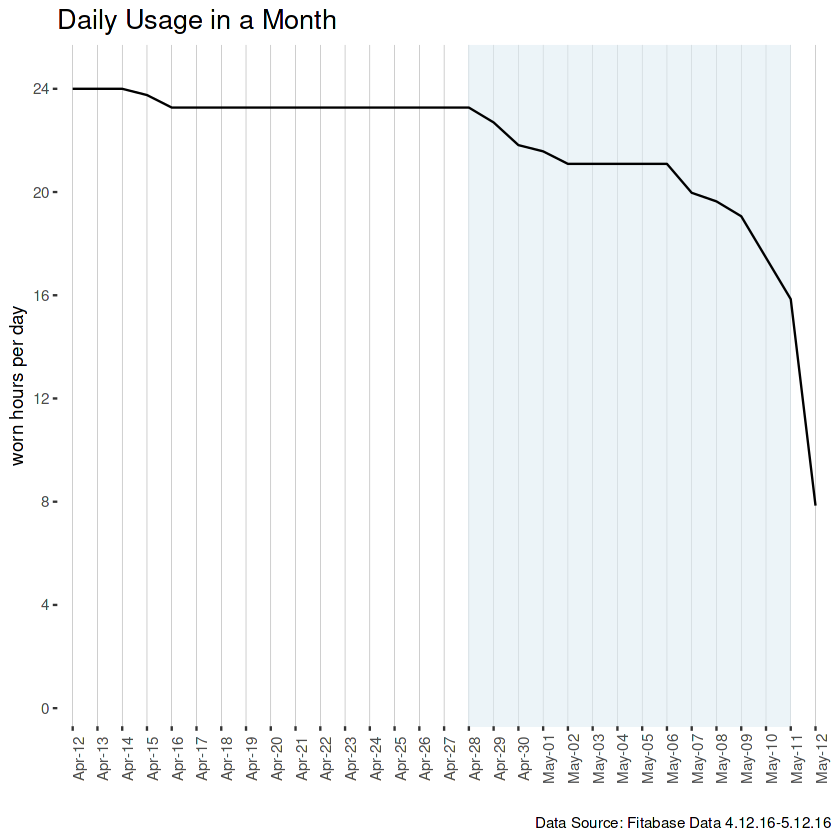

In [33]:
#A line chart shows how users wear the tracker over time:


ggplot(h_step_trend, aes(x=date,y=average_hr))+
  scale_x_date(breaks= date_breaks("1 day"), 
               labels= date_format("%b-%d"), 
               limits=(c(min(h_step_trend$date),
                max(h_step_trend$date))),
               expand=c(.02,.02))+
  scale_y_continuous(limits=c(0,25),
                     breaks= seq(0,max(h_step_trend$average_hr),by= 4), 
                     expand= c(0,.7))+
  labs(title="Daily Usage in a Month", 
       x=" ", y="worn hours per day",
       caption= 'Data Source: Fitabase Data 4.12.16-5.12.16')+
  scale_fill_brewer(palette="BuPu")+ 
  annotate("rect", xmin= as.Date("2016-04-28"), 
           xmax= as.Date("2016-05-11"),
           ymin= -Inf, ymax = Inf, 
           fill= "#E0ECF4", alpha=.6)+ 
theme(axis.text.x= element_text(angle = 90), 
        plot.title= element_text(size=16),
        panel.grid.major.x=element_line(colour="grey60",
                                        linetype="solid",size=0.1),
        panel.background= element_blank())+geom_line()

> This descending line indicates that users wear the tracker full day at first, maintained a average wearing time of 23 hours a day, and then gradually decrease after 2 weeks (April 28th)

# Act - Recommendations 

>  **Key Findings:**

* Users take 7,638 steps per day on average, lower than the daily 10,000 steps recommended by CDC. Users spend 70% of the time being seated or inactive per day.

* A correlation can be identified between daily steps and calories, while there is no correlation between steps taken and amount of time users sleep per day.

* The lightly active type has the longest sleep, while the very active type has the least amount of sleep.

* Users are most active during 11am-1pm on Saturday, and 5-6pm on Wednesday.

* The average time that users keep the tracker on gradually decreases after 2 weeks (April 28th).

> **Based on the findings, Recommendations are as below:**

* The App could recommend daily steps targets based on the user’s profile, lifestyle, and personal goals, and send reminders when the user is behind the targets. Features such as mini games, or wellness trivia, may help creating a sense of reward and thus increase retention rate. The App could send alerts to encourage activity if user remain seated or inactive longer than a certain period of time. This could be useful for users who work from home.

* Studies has shown that social support interventions increase physical activity among adults. The App could enhance social networking features such as in-app chats, or team goal setting among users to promote exercise habits.

* For users who specifically seek sleep improvement, The App could recommend light activities and alert the users if activity level has gone too intense based on their profile. Features to assist meditation may be useful to such users.

* It is worth further looking into why wear time decreases over a period of time. For Bellabeat devices,features such as water-proof, minimalist design, long battery life, or comfort for long wear could help encourage users keep it on all day
 
 

